Decision Tree visualization saved as 'iris_decision_tree.pdf'


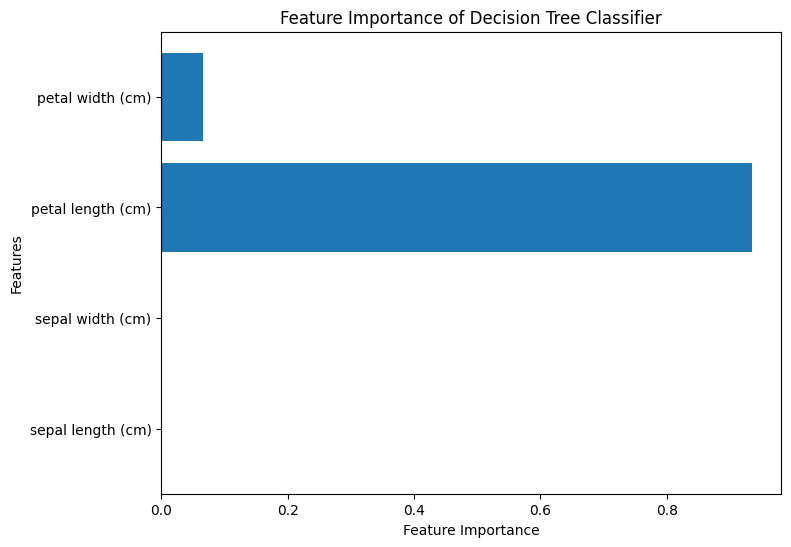

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# Load dataset (using the Iris dataset)
iris = datasets.load_iris()
X = iris.data  # All features
y = iris.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Visualize the tree using graphviz
def visualize_tree(model, feature_names, class_names):
    dot_data = tree.export_graphviz(model, out_file=None,
                                    feature_names=feature_names,
                                    class_names=class_names,
                                    filled=True, rounded=True,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

# Create and render the tree visualization
graph = visualize_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names)
graph.render("iris_decision_tree")

# Display the plot (this generates a file named 'iris_decision_tree.pdf')
print("Decision Tree visualization saved as 'iris_decision_tree.pdf'")

# Optional: Plot feature importance using matplotlib
def plot_feature_importance(model, feature_names):
    plt.figure(figsize=(8, 6))
    plt.barh(feature_names, model.feature_importances_)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance of Decision Tree Classifier")
    plt.show()

# Plot feature importance
plot_feature_importance(dtree, iris.feature_names)
